# Handout 02: Statistical Testing Procedures, Size and Power

This notebook corresponds to Handout 02. Some of the parts have been filled in for you.  The others you will need to fill in yourself as you work through the handout and watch the videos.  The notebook will not be submitted, but some of the quiz questions will relate to the parts that have not been filled.  (I'll post solutions later.) 

In [1]:
#@title Imports
#!pip install -q symbulate
from symbulate import *

import matplotlib.pyplot as plt
%matplotlib inline

## Exer 2.1: Fair or Unfair die?

**Note:** because the RVs here are discrete, when approximating some of the = probabilities below, you need to be careful with fractions and rounding. This is why you'll see things like $\{X \ge 11 / 12\}$ represented as `x.count_geq(11 / 12 - 0.00001)` instead of `x.count_geq(11 / 12)` or `x.count_geq(0.9167)`.

## Size: Null hypothesis - Fair Die

In [2]:
n = 12

P_H0 = BoxModel([1, 2, 3, 4, 5, 6], probs = [1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6]) ** n

### Test A Size: Reject $H_0$ if $N_1 \ge 4$

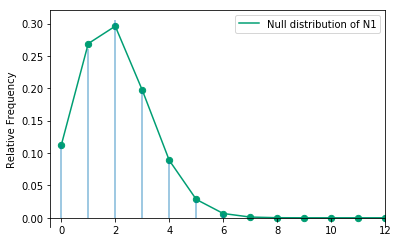

In [3]:
N1_H0 = RV(P_H0, count_eq(1))

n1_H0 = N1_H0.sim(10000)
n1_H0.plot()

Binomial(n, 1 / 6).plot()
plt.legend(['Null distribution of N1']);

In [4]:
cA = 4

n1_H0.count_geq(cA) / n1_H0.count(), 1 - Binomial(n, 1 / 6).cdf(cA - 1)

(0.1199, 0.12517809268000224)

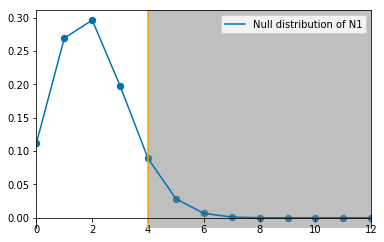

In [5]:
Binomial(n, 1 / 6).plot()

plt.legend(['Null distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

### Test B size

In [6]:
cB = 5

n1_H0.count_geq(cB) / n1_H0.count(), 1 - Binomial(n, 1 / 6).cdf(cB - 1)

(0.0344, 0.03635002209058713)

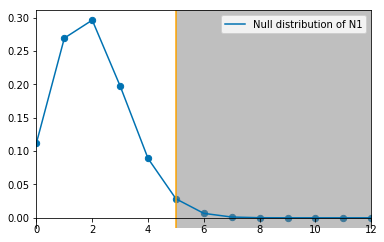

In [7]:
Binomial(n, 1 / 6).plot()

plt.legend(['Null distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cB, color = 'orange');
plt.axvspan(cB, n, alpha = 0.5, color = 'gray');

### Test C size

In [8]:
# Your code here

### Test D size

In [9]:
# Your code here

### Test E size

In [10]:
# Your code here

### Test F size: Reject $H_0$ if $D \ge 3 /12$

0.2137

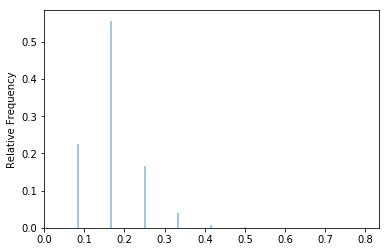

In [11]:
def maxdiff(x):
    return max([abs(x.count_eq(j) / n - 1 / 6) for j in [1, 2, 3, 4, 5, 6]])

D_H0 = RV(P_H0, maxdiff)

d_H0 = D_H0.sim(10000)
d_H0.plot()
plt.xlim(0, 1 - 1 / 6);

d_H0.count_geq(3 / n - 0.0001) / d_H0.count()

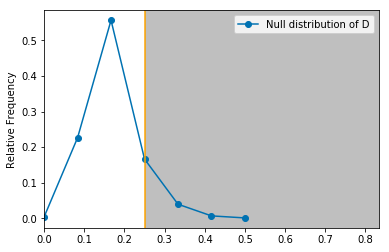

In [12]:
d_H0.plot('density')

plt.legend(['Null distribution of D']);
plt.xlim(0, 1 - 1 / 6);
plt.axvline(x = 3 / n, color = 'orange');
plt.axvspan(3 / n, 1 - 1 / 6, alpha = 0.5, color = 'gray');

### Test G size

In [13]:
# Your code here

### Test H size

In [14]:
# Your code here

### Test Yours!

In [15]:
# Test Yours here

## Power: Alternative Hypothesis - Double-1 Die

In [16]:
n = 12

P_H1 = BoxModel([1, 2, 3, 4, 5], probs = [2 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6]) ** n

### Test A power

(0.607, 0.6069253219077941)

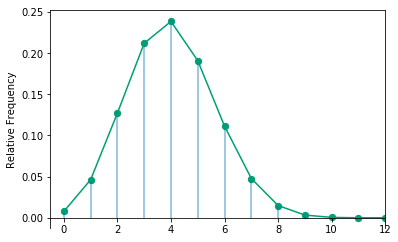

In [17]:
N1_H1 = RV(P_H1, count_eq(1))

n1_H1 = N1_H1.sim(10000)
n1_H1.plot()

Binomial(n, 2 / 6).plot()

n1_H1.count_geq(4) / n1_H1.count(), 1 - Binomial(n, 2 / 6).cdf(3)

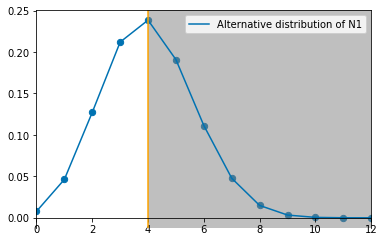

In [18]:
Binomial(n, 2 / 6).plot()

plt.legend(['Alternative distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

Comparison of Size and Power

(0.12517809268000224, 0.6069253219077941)

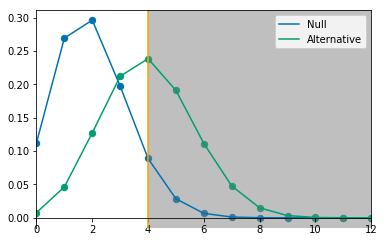

In [19]:
Binomial(n, 1 / 6).plot()
Binomial(n, 2 / 6).plot()

plt.xlim(0, n)
plt.legend(['Null', 'Alternative']);
plt.axvline(x = 4, color = 'orange');
plt.axvspan(4, n, alpha=0.5, color='gray');

1 - Binomial(n, 1 / 6).cdf(4 - 1), 1 - Binomial(n, 2 / 6).cdf(4 - 1)

### Test B power

In [20]:
n1_H1.count_geq(5) / n1_H1.count(), 1 - Binomial(n, 2 / 6).cdf(4)

(0.3669, 0.36847928556509557)

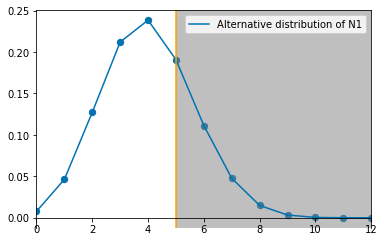

In [21]:
Binomial(n, 2 / 6).plot()

plt.legend(['Alternative distribution of N1']);
plt.xlim(0, n);
plt.axvline(x = cB, color = 'orange');
plt.axvspan(cB, n, alpha = 0.5, color = 'gray');

### Test C and Test D power

No computation necessary!!!

### Test E power

In [22]:
# Your code here

### Test F power

0.5004

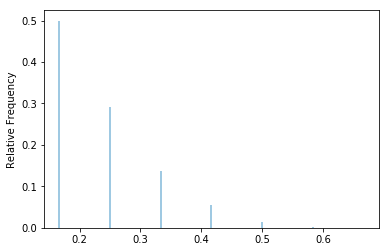

In [23]:
def maxdiff(x):
    return max([abs(x.count_eq(j) / n - 1 / 6) for j in [1, 2, 3, 4, 5, 6]])

D_H1 = RV(P_H1, maxdiff)

d_H1 = D_H1.sim(10000)
d_H1.plot()

d_H1.count_geq(3 / 12 - 0.0001) / d_H1.count()

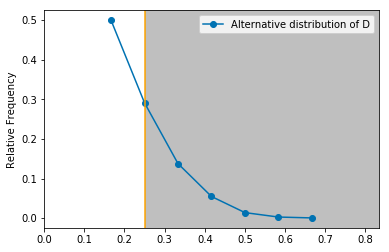

In [24]:
d_H1.plot('density')

plt.legend(['Alternative distribution of D']);
plt.xlim(0, 1 - 1 / 6);
plt.axvline(x = 3 / 12, color = 'orange');
plt.axvspan(3 / 12, 1 - 1 / 6, alpha = 0.5, color = 'gray');

### Test G power

In [25]:
# Your code here

### Test H power

In [26]:
# Your code here

## Most powerful level 0.05 tests for each test statistic

In [27]:
n = 12

P_H0 = BoxModel([1, 2, 3, 4, 5, 6]) ** n

P_H1 = BoxModel([1, 1, 2, 3, 4, 5]) ** n

### Reject $H_0$ if $N_1\ge 5$; that is, Reject $H_0$ if $\hat{p}_1\ge 5 / 12$

Size

0.03635002209058713

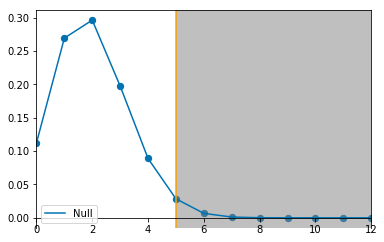

In [28]:
cA = 5

Binomial(n, 1 / 6).plot()

plt.xlim(0, n);
plt.legend(['Null']);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, 1 / 6).cdf(cA - 1)

Power

0.36847928556509557

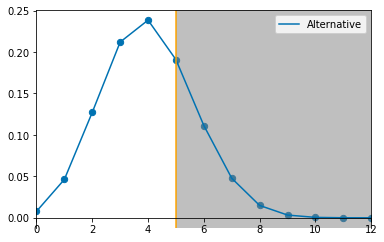

In [29]:
Binomial(n, 2 / 6).plot()

plt.xlim(0, n);
plt.legend(['Alternative']);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha = 0.5, color = 'gray');

1 - Binomial(n, 2 / 6).cdf(cA - 1)

### Size and Power: Reject $H_0$ if $N_1\ge 5$; that is, Reject $H_0$ if $\hat{p}_1\ge 5 / 12$

(0.03635002209058713, 0.36847928556509557)

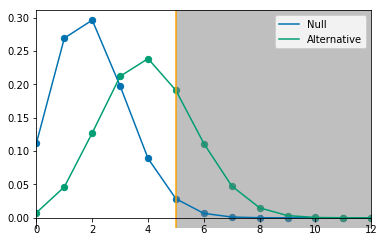

In [30]:
Binomial(n, 1 / 6).plot()
Binomial(n, 2 / 6).plot()
plt.xlim(0, n)
plt.legend(['Null', 'Alternative']);
plt.axvline(x = cA, color = 'orange');
plt.axvspan(cA, n, alpha=0.5, color='gray');

1 - Binomial(n, 1 / 6).cdf(cA - 1), 1 - Binomial(n, 2 / 6).cdf(cA - 1)

### Most powerful level 0.05 test for $D$: Reject $H_0$ if $D \ge $???

In [31]:
# Your code here

### Most powerful level 0.05 test for $\bar{X}$: Reject $H_0$ if $\bar{X} \le $???

In [32]:
# Your code here

### Most powerful level 0.05 test for $|\bar{X}-3.5|$: Reject $H_0$ if $|\bar{X}-3.5| \ge $???

Note: Using 1 instead of 13/12 yields a size that is just above 0.05, so would not qualify as a level 0.05 test if the significance level is interpretted strictly.

In [33]:
# Your code here

## Exer 2.1: Changing sample size from $n=12$ to $n=24$

In [34]:
# Your code here

## Exer 2.2 - Exponential rate

In [35]:
# Your code here